In [1]:
import pandas as pd

# Chargez le fichier CSV dans un DataFrame pandas
df = pd.read_csv("dataTp2.csv")

# Affichez les premières lignes du DataFrame
df.head()


,Unnamed: 0,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment
0,2157,0.501000,0.405000,0.407000,0.320000,0.365000,0
1,1223,0.497667,0.427000,0.408667,0.290000,0.378333,0
2,1083,0.460600,0.439800,0.421000,0.308400,0.406600,0
3,456,0.498000,0.454000,0.386000,0.379000,0.402000,0
4,1448,0.458818,0.483091,0.406909,0.297818,0.395273,0


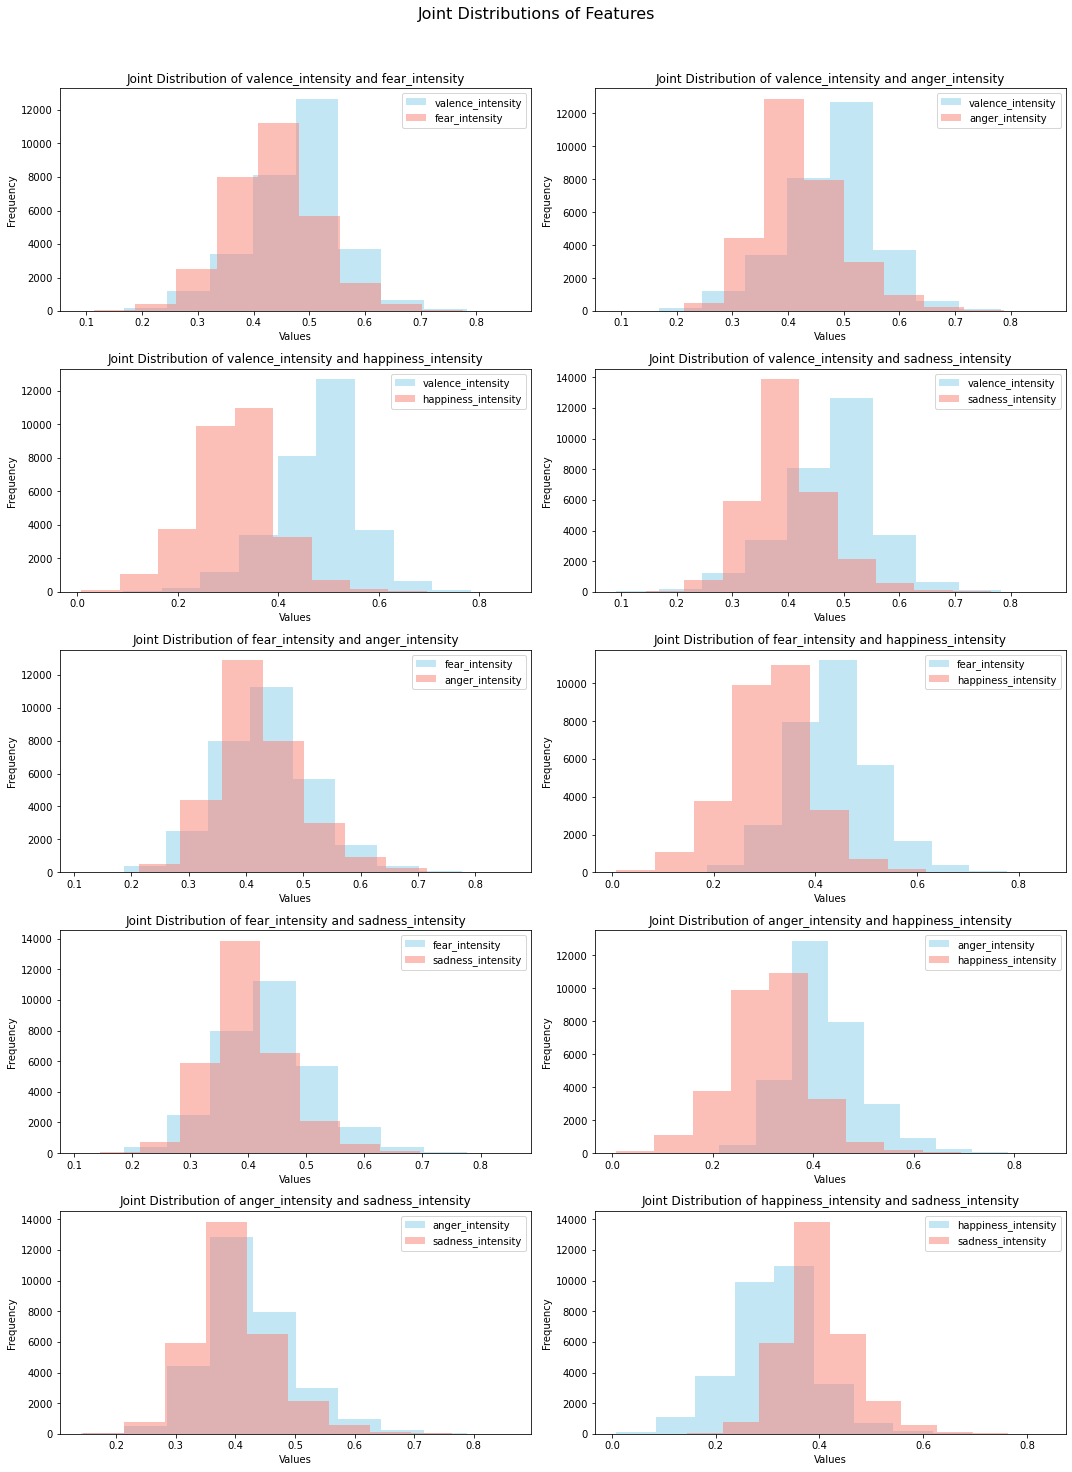

In [20]:
import matplotlib.pyplot as plt
 
# Select the features for joint distribution plots
selected_features = ['valence_intensity', 'fear_intensity', 'anger_intensity', 'happiness_intensity', 'sadness_intensity']
 
# Create all possible pairs of features
feature_pairs = [(feature1, feature2) for i, feature1 in enumerate(selected_features) for feature2 in selected_features[i+1:]]
 
# Create the joint distribution histogram plots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Joint Distributions of Features', y=1.02, fontsize=16)
 
for i, (feature1, feature2) in enumerate(feature_pairs):
    row, col = divmod(i, 2)
 
    # Plotting histograms with different colors for each feature
    axes[row, col].hist(df[feature1], bins=10, color='skyblue', alpha=0.5, label=feature1)
    axes[row, col].hist(df[feature2], bins=10, color='salmon', alpha=0.5, label=feature2)
 
    axes[row, col].set_title(f'Joint Distribution of {feature1} and {feature2}')
    axes[row, col].set_xlabel('Values')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()
 
plt.tight_layout()
plt.show()                                    

In [21]:
pip install umap

In [22]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import umap
import umap.umap_ as umap
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
 
# Assuming df is your DataFrame
# Sélectionner les caractéristiques pour l'analyse K-means
features = df[['valence_intensity', 'fear_intensity', 'anger_intensity', 'happiness_intensity', 'sadness_intensity']]
 
# Appliquer K-means pour différentes valeurs de K
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster_k{}'.format(k)] = kmeans.fit_predict(features)
 
# Import UMAP from umap-learn
reducer = umap.UMAP()
embedding = reducer.fit_transform(features)
 
# Visualiser les clusters pour chaque valeur de K avec UMAP
plt.figure(figsize=(15, 10))
 
for i, k in enumerate(k_values, 1):
    plt.subplot(3, 3, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=df['cluster_k{}'.format(k)], cmap='viridis', s=10)
    plt.title('K = {}'.format(k))
    plt.colorbar()
 
plt.tight_layout()
plt.show()

ImportError: Numba needs NumPy 1.21 or less